In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data_features = np.load(PATH+'images_features.npy', allow_pickle=True)

data_features = tf.reshape(data_features, (9908, -1))  #(9908, 2, 4, 512)
print(data_features.shape)

(9908, 4096)


In [25]:
# get model
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(86, 128, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0     

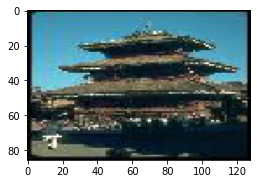

In [26]:
# load query
query = kimage.load_img(PATH+'q2.jpg', target_size=(86, 128))

import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(query)

In [9]:
print(type(query))  # opencv cv2

<class 'PIL.Image.Image'>


In [27]:
query_np = kimage.img_to_array(query)
print(type(query_np))
print(query_np.shape)


query_np = np.expand_dims(query_np, axis=0)
print(query_np.shape)
query_np = preprocess_input(query_np)

<class 'numpy.ndarray'>
(86, 128, 3)
(1, 86, 128, 3)


In [28]:
# get features
query_features = model.predict(query_np)
print(query_features.shape)

query_features = tf.reshape(query_features, (1,-1))
print(query_features.shape)

ValueError: ignored

In [17]:
# compute similarity
sims = cosine_similarity(query_features, data_features).squeeze()
print(sims.shape)

(9908,)


In [18]:
# sort
def getKey(item):
    return item[0]

lists = [i for i in range(9908)]
tps = zip(sims.tolist(), lists)
tps_sorted = sorted(tps, key=getKey, reverse=True)

for i in range(8):
    print(tps_sorted[i])

(1.000000238418579, 3425)
(0.6695321798324585, 3478)
(0.6522352695465088, 3586)
(0.6380984783172607, 3411)
(0.6146316528320312, 3407)
(0.6022665500640869, 3662)
(0.5916527509689331, 319)
(0.5789052248001099, 3376)


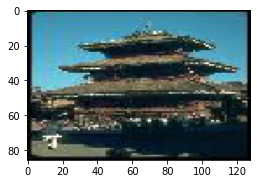

In [ ]:
# show results
import matplotlib
import matplotlib.pyplot as plt

#query = kimage.load_img(PATH+'q2.jpg', target_size=(86, 128))

plt.figure(figsize=(4,4))
plt.imshow(query)

In [19]:
data_show = np.load(PATH+'images_mr.npy', allow_pickle=True)
data_show = data_show.astype(np.float32)
print(data_show.shape)

(9908, 86, 128, 3)


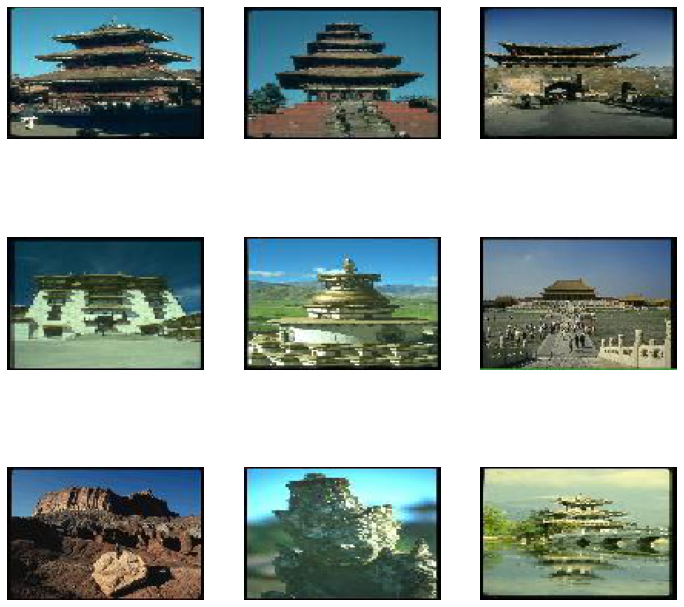

In [20]:
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]
    img = data_show[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img/255.0)